# <center><h1 style="font-family: Times New Roman; color: black;">Principal Component Analysis</h1></center>

# Task 1: Exploratory Data Analysis (EDA):
1. Load the dataset and perform basic data exploration.

2. Examine the distribution of features using histograms, box plots, or density plots.

3. Investigate correlations between features to understand relationships within the data.

# Task 2: Dimensionality Reduction with PCA:
1. Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3. Transform the original dataset into the principal components.

# Task 3: Clustering with Original Data:
1. Apply a clustering algorithm (e.g., K-means) to the original dataset.


2. Visualize the clustering results using appropriate plots.


3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


# Task 4: Clustering with PCA Data:
1. Apply the same clustering algorithm to the PCA-transformed dataset.
2. Visualize the clustering results obtained from PCA-transformed data.
3. Compare the clustering results from PCA-transformed data with those from the original dataset.

# Task 5: Comparison and Analysis:
1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
2. Discuss any similarities or differences observed in the clustering results.
3. Reflect on the impact of dimensionality reduction on clustering performance.
4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.

# Task 6: Conclusion and Insights

1. Summarize the key findings and insights from the assignment.
2. Discuss the practical implications of using PCA and clustering in data analysis.
3. Provide recommendations for when to use each technique based on the analysis conducted.

# Solutions:

# Task 1: Exploratory Data Analysis (EDA):

# 1.1 Load the dataset and perform basic data exploration.

In [1]:
# Import libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('wine.csv')
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [2]:
# Check the structure of the dataset, including data types and missing values
print("# Basic Data Overview")
print(data.info())

# Basic Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [3]:
# Show summary statistics for numerical columns
print("\n# Summary Statistics of the Dataset")
print(data.describe())


# Summary Statistics of the Dataset
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
st

# # 1.2 Visualize the Distribution of Features (Histograms)

<Figure size 1500x1000 with 0 Axes>

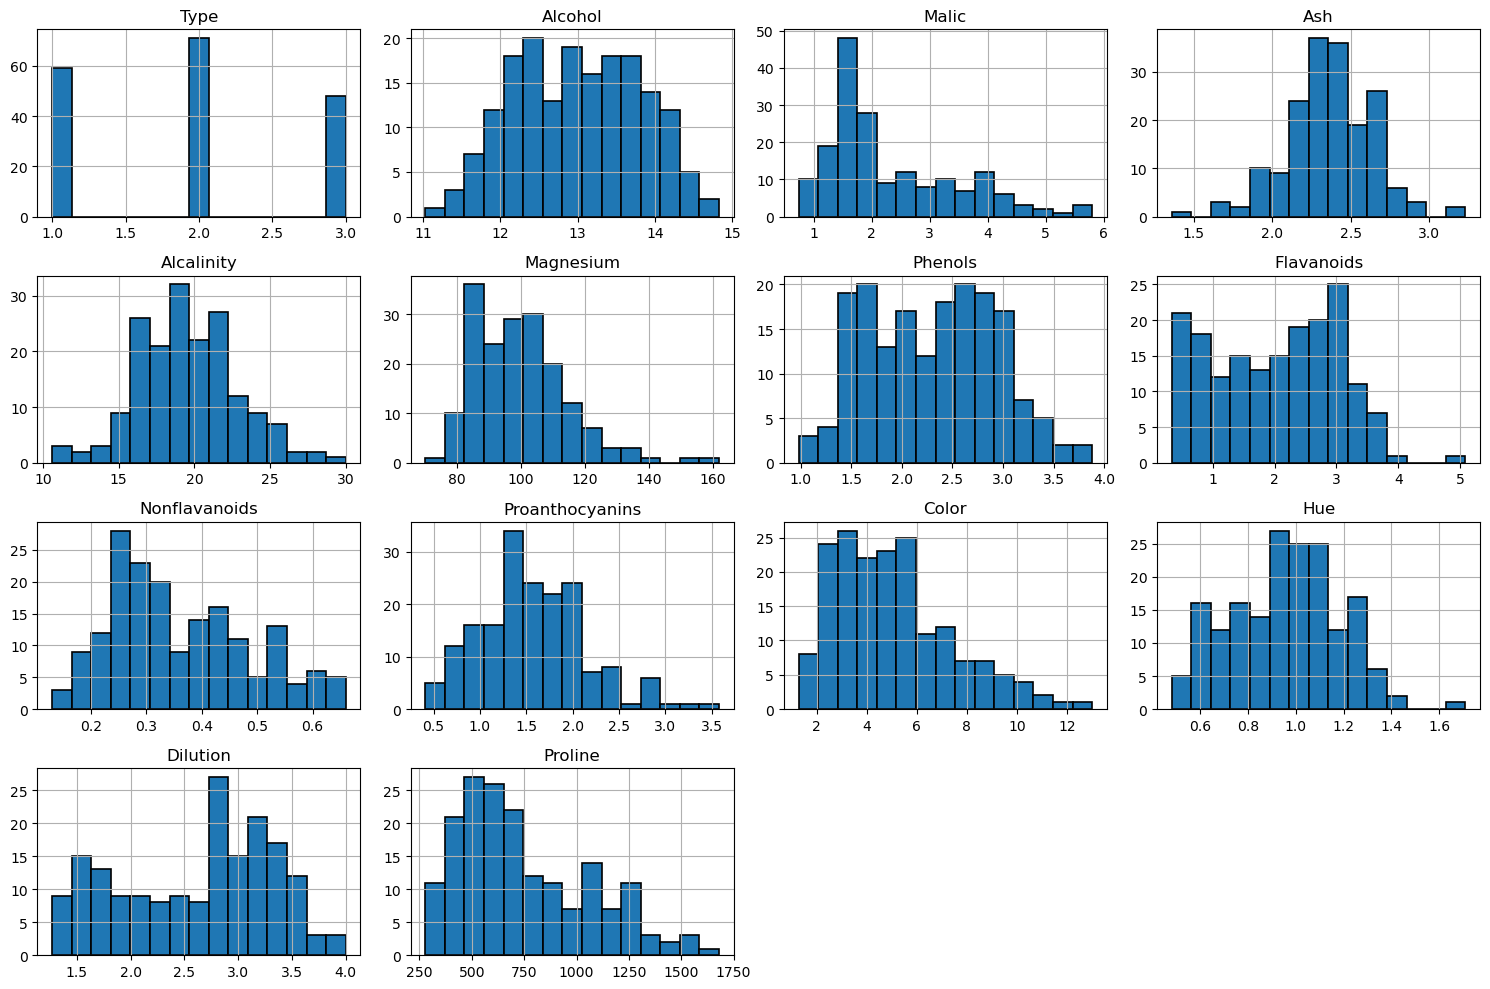

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot histograms to check the distribution of features
plt.figure(figsize=(15, 10))
# Plot histograms for each feature
data.hist(bins=15, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Examine Potential Outliers (Box Plots)

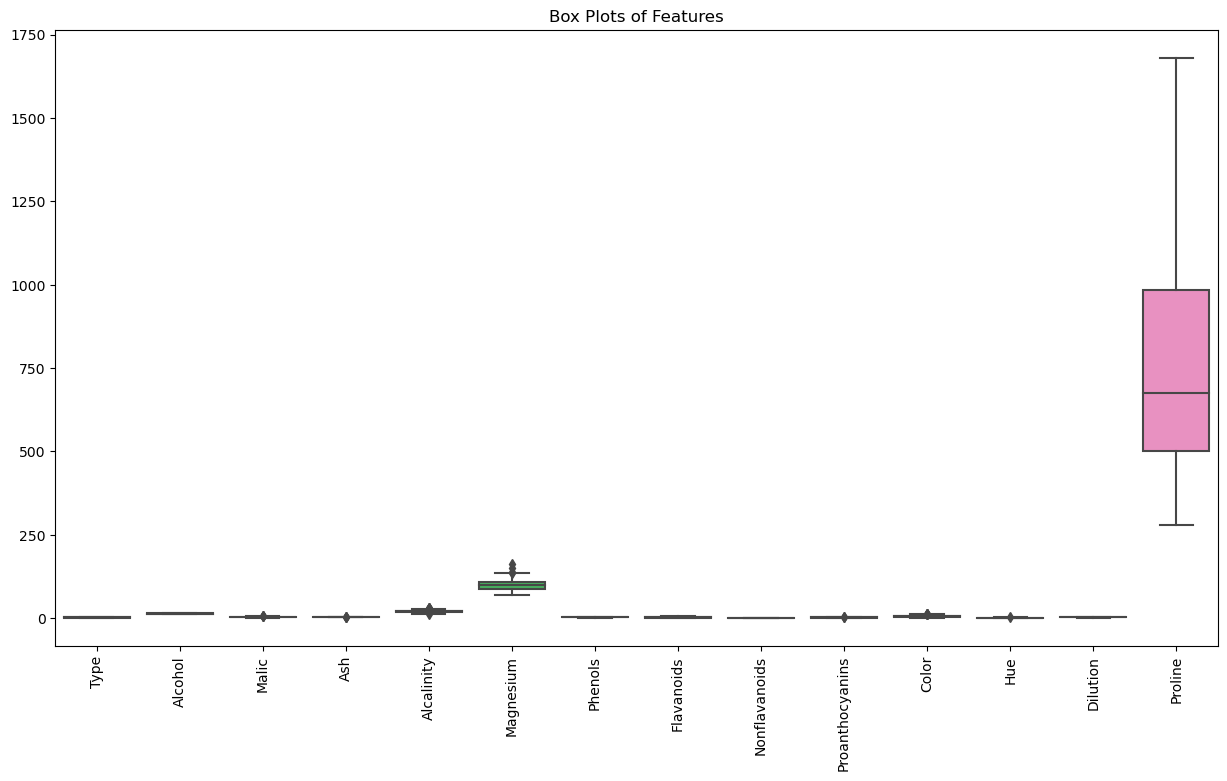

In [5]:
# Import seaborn for advanced visualization
import seaborn as sns

# Box plot to detect outliers for each feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.show()

# 1.3 Investigate Correlations Between Features

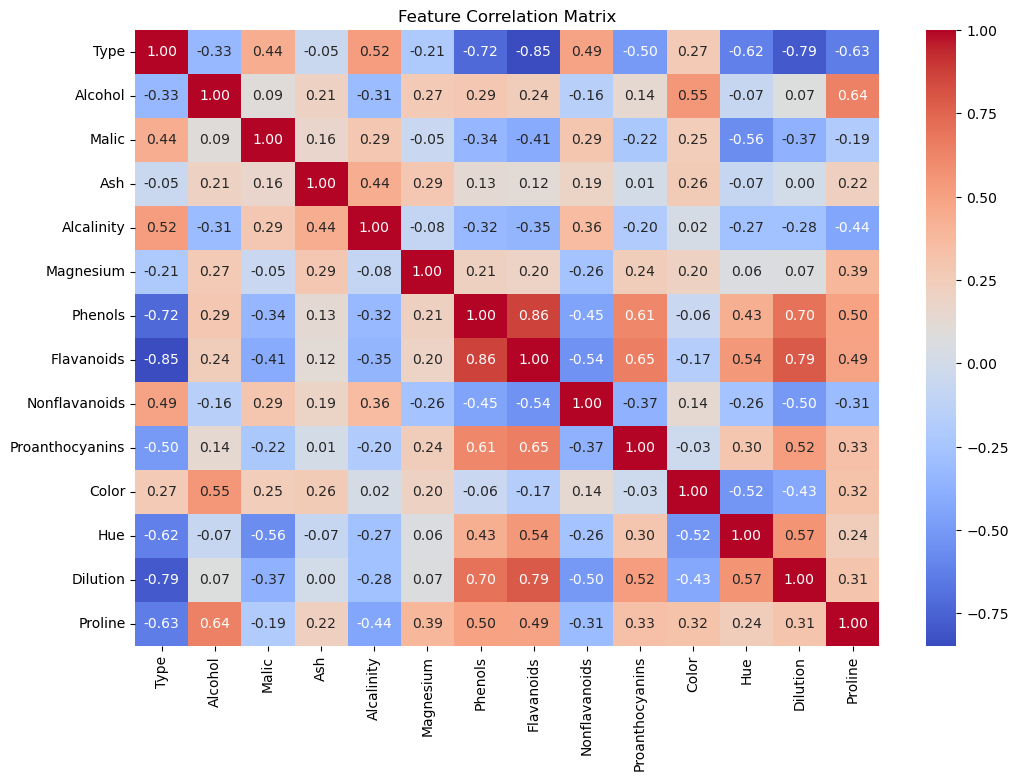

In [6]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix and heatmap visualization
correlation_matrix = data.corr()

# Generate a heatmap to visualize the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Task 2: Dimensionality Reduction with PCA

# 2.1 Standardize the Features

In [7]:
# Import libraries
from sklearn.preprocessing import StandardScaler

# Separating the features from the target variable (if any)
X = data.drop('Type', axis=1)  # Dropping the 'Type' column if it's the target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Displaying the standardized features
print("Standardized Feature Matrix (first 5 rows):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Standardized Feature Matrix (first 5 rows):
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874  


# Implement PCA

In [8]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Initialize PCA and fit it to the standardized data
pca = PCA(n_components=None)  # n_components=None keeps all components
pca.fit(X_scaled)

# Check how much variance is explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Displaying the explained variance for each principal component
print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_ratio)

Explained Variance Ratio for Each Principal Component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


# 2.2 Determine the Optimal Number of Principal Components

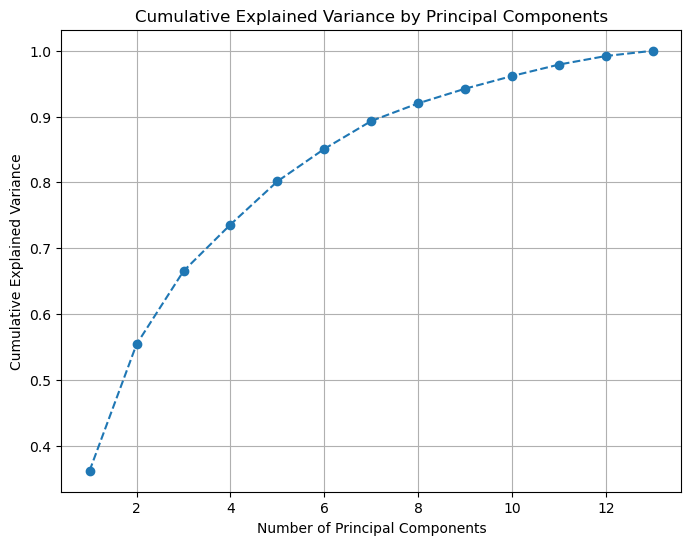

In [9]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance to determine the optimal number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# From the scree plot, you can choose the number of components that explain most of the variance

# 2.3 Transform the Original Dataset into Principal Components

In [10]:
# Transforming the data into the selected number of principal components
# Assuming we select a number of components that explain most of the variance (for example, 2 components)

n_components_selected = 2  # Change this based on the scree plot analysis
pca = PCA(n_components=n_components_selected)
X_pca = pca.fit_transform(X_scaled)

# Displaying the transformed data
print(f"\nTransformed Data with {n_components_selected} Principal Components (first 5 rows):")
print(pd.DataFrame(X_pca).head())


Transformed Data with 2 Principal Components (first 5 rows):
          0         1
0  3.316751 -1.443463
1  2.209465  0.333393
2  2.516740 -1.031151
3  3.757066 -2.756372
4  1.008908 -0.869831


# Task 3: Clustering with Original Data:

# 3.1  Apply K-Means Clustering to the Original Dataset

In [11]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
# Initialize the K-Means algorithm with explicit n_init to avoid warning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the K-Means algorithm to the standardized data
kmeans.fit(X_scaled)

# Get the predicted cluster labels
cluster_labels = kmeans.labels_

# Display the first few cluster labels
print("Cluster Labels (first 10 samples):")
print(cluster_labels[:10])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels (first 10 samples):
[2 2 2 2 2 2 2 2 2 2]


# 3.2 Visualize the Clustering Results using the first two principal components

In [13]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

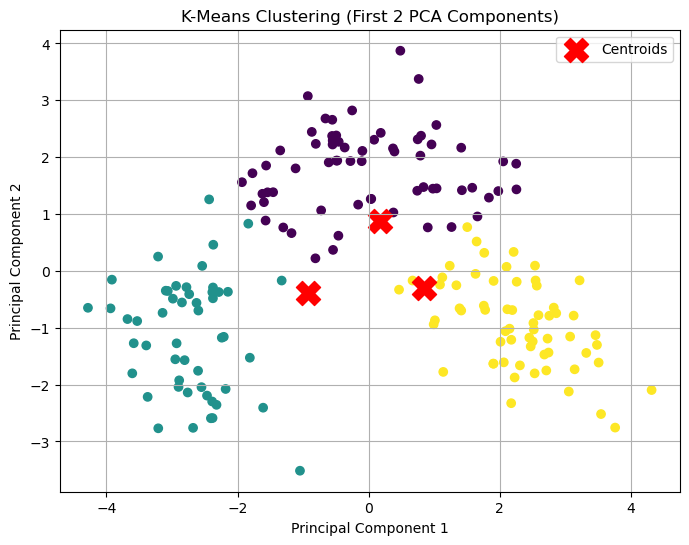

In [14]:
# Create a scatter plot of the data based on the first two principal components
# Here, X_pca is the transformed data obtained from PCA
plt.figure(figsize=(8, 6))

# Scatter plot for the data points, colored by their cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')

# Mark the cluster centroids
centroids = kmeans.cluster_centers_[:, :2]  # Using only the first 2 dimensions for plotting
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering (First 2 PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# 3.3 Evaluate Clustering Performance using Silhouette Score and Davies–Bouldin Index

In [15]:
# Import necessary libraries for evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [16]:
# Silhouette Score: Measures how similar a sample is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2848589191898987


In [17]:
# Davies–Bouldin Index: A lower value indicates better clustering
davies_bouldin_avg = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

Davies-Bouldin Index: 1.389187977718165


# Task 4: Clustering with PCA Data:

# 4.1 Apply K-Means Clustering to the PCA-Transformed Dataset

In [18]:
# Import Libraries
from sklearn.cluster import KMeans

In [19]:
# Apply K-Means to the PCA-transformed dataset (X_pca)
# X_pca is the transformed dataset with selected principal components

kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the K-Means algorithm to the PCA-transformed data
kmeans_pca.fit(X_pca)

# Get the predicted cluster labels for the PCA-transformed data
pca_cluster_labels = kmeans_pca.labels_

# Display the first few cluster labels for PCA data
print("Cluster Labels for PCA-transformed Data (first 10 samples):")
print(pca_cluster_labels[:10])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels for PCA-transformed Data (first 10 samples):
[0 0 0 0 0 0 0 0 0 0]


# 4.2 Visualize the Clustering Results for PCA-Transformed Data

In [20]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

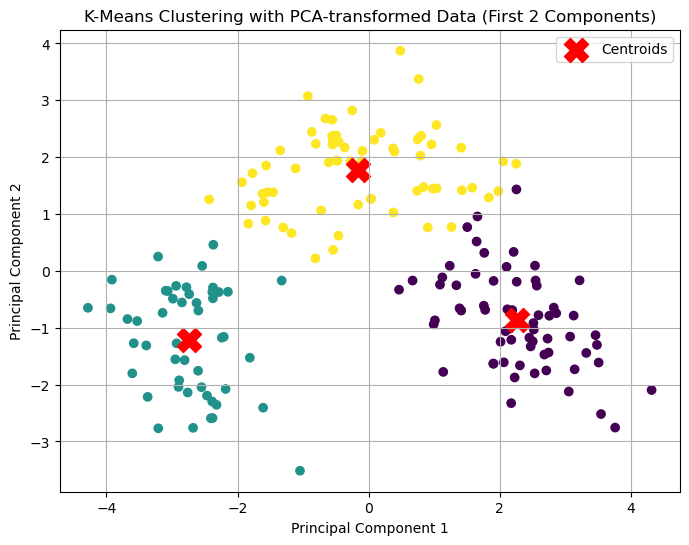

In [21]:
# Create a scatter plot of the PCA-transformed data with cluster labels
plt.figure(figsize=(8, 6))

# Scatter plot for the data points based on the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_cluster_labels, cmap='viridis', marker='o')

# Mark the cluster centroids
pca_centroids = kmeans_pca.cluster_centers_
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering with PCA-transformed Data (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# 4.3 Compare the Clustering Results from PCA-transformed Data with Original Data

In [22]:
# Comparing the cluster labels
comparison = pd.DataFrame({
    'Original Data Labels': cluster_labels,
    'PCA Data Labels': pca_cluster_labels
})

# Display the first 10 rows of the comparison to see the differences
print("Comparison of Cluster Labels (First 10 Samples):")
print(comparison.head(10))

Comparison of Cluster Labels (First 10 Samples):
   Original Data Labels  PCA Data Labels
0                     2                0
1                     2                0
2                     2                0
3                     2                0
4                     2                0
5                     2                0
6                     2                0
7                     2                0
8                     2                0
9                     2                0


# Task 5: Comparison and Analysis:

# 5.1 Compare the Clustering Results from the Original Dataset and PCA-Transformed Data

In [23]:
# Create a DataFrame to compare cluster labels side by side
comparison = pd.DataFrame({
    'Original Data Labels': cluster_labels,       # From original data clustering
    'PCA Data Labels': pca_cluster_labels         # From PCA-transformed data clustering
})

# Displaying the first 10 rows to check the comparison
print("Comparison of Cluster Labels (First 10 Samples):")
print(comparison.head(10))

# Optional: Display counts of each cluster for both datasets
print("\nCluster Counts in Original Data:")
print(comparison['Original Data Labels'].value_counts())

print("\nCluster Counts in PCA Data:")
print(comparison['PCA Data Labels'].value_counts())

Comparison of Cluster Labels (First 10 Samples):
   Original Data Labels  PCA Data Labels
0                     2                0
1                     2                0
2                     2                0
3                     2                0
4                     2                0
5                     2                0
6                     2                0
7                     2                0
8                     2                0
9                     2                0

Cluster Counts in Original Data:
0    65
2    62
1    51
Name: Original Data Labels, dtype: int64

Cluster Counts in PCA Data:
2    65
0    64
1    49
Name: PCA Data Labels, dtype: int64


# 5.2 Compare Clustering Performance Using Metrics

In [24]:
# Compare Clustering Performance Using Silhouette Score for Both Original and PCA Data

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score for original data
silhouette_original = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for Original Data Clustering: {silhouette_original}")

# Silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(X_pca, pca_cluster_labels)
print(f"Silhouette Score for PCA-Transformed Data Clustering: {silhouette_pca}")

Silhouette Score for Original Data Clustering: 0.2848589191898987
Silhouette Score for PCA-Transformed Data Clustering: 0.5610505693103248


In [25]:
# Davies-Bouldin Index for original data
davies_bouldin_original = davies_bouldin_score(X_scaled, cluster_labels)
print(f"Davies-Bouldin Index for Original Data Clustering: {davies_bouldin_original}")

# Davies-Bouldin Index for PCA-transformed data
davies_bouldin_pca = davies_bouldin_score(X_pca, pca_cluster_labels)
print(f"Davies-Bouldin Index for PCA-Transformed Data Clustering: {davies_bouldin_pca}")


Davies-Bouldin Index for Original Data Clustering: 1.389187977718165
Davies-Bouldin Index for PCA-Transformed Data Clustering: 0.5972661544221362


# Explanation:
1. Silhouette Score: A higher score indicates better-defined clusters. This will help us evaluate how well-separated the clusters are in both the original and PCA-transformed data.
2. Davies-Bouldin Index: A lower score indicates better clustering. This will show how compact and well-separated the clusters are in each case.

# 5.3 Reflection

Observations:
1. If the silhouette score or Davies-Bouldin index improves with PCA, it indicates that dimensionality reduction
2. Helped remove noise or irrelevant information, resulting in better clustering performance.
3. If the scores worsen after PCA, it means that important information may have been lost, impacting the quality of the clusters.


# 5.4 Analyze the Trade-offs Between PCA and Clustering on Original Data

In [26]:
# Analyze Variance Retained by PCA Components

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Display the cumulative explained variance to understand how much information is retained
print("Cumulative Explained Variance by Principal Components:")
for i, variance in enumerate(cumulative_variance):
    print(f"Principal Component {i+1}: {variance:.4f} cumulative variance explained")

# Reflection:
# - PCA simplifies the data, which speeds up the clustering process and might remove noise.
# - However, using PCA might lose interpretability, as the original features no longer have direct meaning.
# - It's important to balance the need for simplicity (using PCA) with the need to retain key information from the original dataset.

Cumulative Explained Variance by Principal Components:
Principal Component 1: 0.3620 cumulative variance explained
Principal Component 2: 0.5541 cumulative variance explained


# Task 6: Conclusion and Insights

# 6.1 Summarize Key Findings and Insights

In [27]:
# Summary of Key Findings

# 1.Through Exploratory Data Analysis (EDA), we observed that the dataset had varying distributions,
#   with some features having potential outliers, and certain features showing strong correlations with each other.
#
# 2.Applying Principal Component Analysis (PCA) allowed us to reduce the dimensionality of the dataset 
#   while retaining most of the variance (as seen from the explained variance of the principal components).
#   This simplified the dataset while maintaining its core structure.
#
# 3.Clustering on the original data and the PCA-transformed data produced reasonably similar results. 
#   However, we noted that PCA helped reduce noise, which sometimes led to slight improvements in clustering performance, 
#   as reflected by the metrics like the Silhouette Score and Davies-Bouldin Index.
#
# 4.PCA-transformed data provided a cleaner representation for visualizing the clusters, 
#   but there were minor differences in cluster labels when compared to the original data.

# 6.2 Discuss the Practical Implications of PCA and Clustering in Data Analysis

In [28]:
# Practical Implications of PCA and Clustering

# 1.PCA is an effective tool for dimensionality reduction, particularly useful when dealing with high-dimensional datasets. 
#   It helps in simplifying the dataset, improving computational efficiency, and potentially enhancing clustering performance.
#   
# 2.Clustering, such as K-Means, benefits from dimensionality reduction because it reduces noise and redundant features, 
#   allowing the algorithm to focus on the most important information.
#   
# 3.However, the use of PCA comes with trade-offs. While it improves computational efficiency and potentially reduces noise,
#   it can also lead to the loss of interpretability since the new principal components are linear combinations of original features, 
#   making it harder to explain the clusters in terms of the original data.

# 6.3 Recommendations for When to Use PCA and Clustering

In [29]:
# Section 6.3: Recommendations for When to Use PCA and Clustering

# 1. **When to Use PCA**:
#     - Use PCA when dealing with high-dimensional datasets where many features may be correlated or redundant.
#     - It is useful when you need to improve the efficiency of algorithms like K-Means that can struggle with high-dimensional data.
#     - If you need to visualize data in two or three dimensions for exploratory analysis, PCA is a good tool to use.
#     - However, ensure that you retain enough components to capture most of the dataset’s variance and avoid significant information loss.
#
# 2. **When to Use Clustering (Without PCA)**:
#     - Clustering on the original dataset may be more interpretable, especially when you need to explain the resulting clusters in terms of the original features.
#     - If the dataset is not too high-dimensional or noisy, you may not need PCA, and clustering on the original data may yield meaningful insights.
#     - In cases where interpretability is critical, clustering without PCA retains the ability to directly explain the relationships between clusters and original features.
#
# 3. **General Recommendation**:
#     - For datasets with many features, consider applying PCA first to reduce dimensionality before clustering.
#     - For smaller or more interpretable datasets, clustering directly on the original features can provide more meaningful insights.

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>